# Avance 1. Análisis exploratorio de datos

**Optimización de captación de clientes de Gigstack usando algoritmos de aprendizaje automático distribuidos en la nube.**

**Dra. Grettel Barceló Alonso**

**Equipo 31**

**Gabriel Paredes Garza | A00797698**

**Alejandro Juárez Corona | A01168444**

**María Nelly Porras Alcantar | A01793828**

**29 de septiembre 2024**

In [4]:
import pandas as pd

# Read cfdi.csv using utf-8
df = pd.read_csv('cfdi.csv', encoding='latin-1')

# Basic data analysis
print(df.head())  # Display the first 5 rows
print(df.info())  # Get information about the data types and missing values
print(df.describe())  # Generate descriptive statistics (count, mean, std, etc.)

      clave               descripcion Incluir IVA trasladado  \
0   1010101  No existe en el catálogo               Opcional   
1  10101500  Animales vivos de granja               Opcional   
2  10101501               Gatos vivos               Opcional   
3  10101502                    Perros               Opcional   
4  10101504                     Visón               Opcional   

  Incluir IEPS trasladado  Complemento que debe incluir FechaInicioVigencia  \
0                Opcional                           NaN            1/1/2022   
1                Opcional                           NaN            1/1/2022   
2                Opcional                           NaN            1/1/2022   
3                Opcional                           NaN            1/1/2022   
4                Opcional                           NaN            1/1/2022   

   FechaFinVigencia  Estímulo Franja Fronteriza  palabras_similares  \
0               NaN                           0  Público en general  

# Análisis Preliminar

Tenemos dos tablas, una con Clave Unidad CFDI y otra con Clave Producto/Servicio CFDI. Vamos a analizar las dos tablas para ver si hay cosas que podamos descartar y ver si hay manera de limpiar la data o mejorar la presentación antes de trabajar con ella.

## Unidades CFDI

En el caso de las Unidades, tenemos las siguientes columnas: Nombre, Descripción, Nota, Fecha de inicio de vigencia, Fecha de fin de vigencia, Símbolo. Es probable que podamos descartar ambas Fechas y Notas. La tabla contiene 2417 filas.

## Claves de Producto/Servicio CFDI

En el caso de las Claves, tenemos las siguientes columnas: Descripción, Incluir IVA trasladado, Incluir IEPS trasladado, Complemento que debe incluir, FechaInicioVigencia, FechaFinVigencia, Estímulo Franja Fronteriza y Palabras similares. Podemos notar que igual que en la tabla de Unidades podemos descartar muchas columnas, en este caso prácticamente todas menos Descripción y Palabras Similares. Esta tabla contiene 52,511 filas.


In [5]:
# Select only the desired columns
df_selected = df[['clave', 'descripcion', 'palabras_similares']]

# Rename the column 'c_ClaveUnidad' to 'Clave'
df_selected = df_selected.rename(columns={'c_ClaveUnidad': 'Clave'})

# Display the modified dataframe
print(df_selected.head())


      clave               descripcion  palabras_similares
0   1010101  No existe en el catálogo  Público en general
1  10101500  Animales vivos de granja                 NaN
2  10101501               Gatos vivos                 NaN
3  10101502                    Perros                 NaN
4  10101504                     Visón                 NaN


In [7]:
from collections import Counter

# Concatenar todas las descripciones en una sola cadena de texto
all_descriptions = ' '.join(df_selected['descripcion'].astype(str))

# Tokenizar las descripciones (dividirlas en palabras)
words = all_descriptions.lower().split()

# Contar la frecuencia de cada palabra
word_counts = Counter(words)

# Mostrar las palabras más comunes (las que aparecen más veces)
print(word_counts.most_common(20))


[('de', 27621), ('o', 8523), ('en', 6671), ('para', 5093), ('orgánica', 4079), ('orgánico', 3007), ('seco', 2877), ('seca', 2828), ('cortado', 2827), ('lata', 2635), ('frasco', 2626), ('cortada', 2227), ('rosal', 2109), ('y', 1958), ('servicios', 1775), ('congelada', 1594), ('congelado', 1512), ('fresco', 1458), ('vivo', 1365), ('uva', 1312)]


## Preguntas Comunes

### ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?

No hay valores nulos, porque es una base de datos proporcionada por el SAT.

### ¿Cuáles son las estadísticas resumidas del conjunto de datos?

En la base de datos de Claves, hay 12,201 entradas con descripción y 52,157 sin descripción. Es importante notar que algunas de las descripciones podrían respaldar la descripción de cada columna. Por ejemplo, para el producto de “Cuarto de baño portátil”, tiene de palabras similares “Servicios en baños portátiles, Servicios en baños públicos”. Habría que analizar con más detalle si podemos

### ¿Hay valores atípicos en el conjunto de datos?

Los valores están ad hoc con lo esperado en la base de datos.

### ¿Cuál es la cardinalidad de las variables categóricas?

Todas las variables son categóricas y no hay ningún repetido.

### ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

No hay sesgo en la base de datos pues es toda categórica.

### ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo)

El conjunto de datos no tiene ninguna dependencia temporal.

### ¿Hay correlación entre las variables dependientes e independientes?

No hay.

### ¿Cómo se distribuyen los datos en función de diferentes categorías?

En este caso es justamente lo que buscamos hacer, pero con otra variable que falta con las puras bases de datos. Con una descripción humana de lo que se busca vender de producto/servicio, queremos juntar la unidad y el código. En este caso es intencional que no puedan relacionarse.

### ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

Hicimos un análisis de K Means clustering para encontrar patrones o agrupaciones. En este caso notamos que hay muchos elementos del sector agropecuario. No estamos seguros si el SAT utiliza esta catalogación para algo más, pero no creemos que podamos hacer mucho con este hallazgo.

### ¿Se deberían normalizar las imágenes para visualizarlas mejor?

La base de datos no contiene imágenes.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


      clave               descripcion  palabras_similares  \
0   1010101  No existe en el catálogo  Público en general   
1  10101500  Animales vivos de granja                 NaN   
2  10101501               Gatos vivos                 NaN   
3  10101502                    Perros                 NaN   
4  10101504                     Visón                 NaN   

                                 combined_text  cluster  
0  No existe en el catálogo Público en general        0  
1                 Animales vivos de granja nan        0  
2                              Gatos vivos nan        0  
3                                   Perros nan        3  
4                                    Visón nan        3  
Cluster 0: Most common words: [('de', 29327), ('nan', 27744), ('o', 8083), ('en', 7713), ('para', 5435), ('orgánica', 4278), ('seca', 3493), ('cortada', 3033), ('lata', 2910), ('frasco', 2874)]
Cluster 1: Most common words: [('de', 1943), ('servicio', 866), ('nan', 473), ('en', 202), 

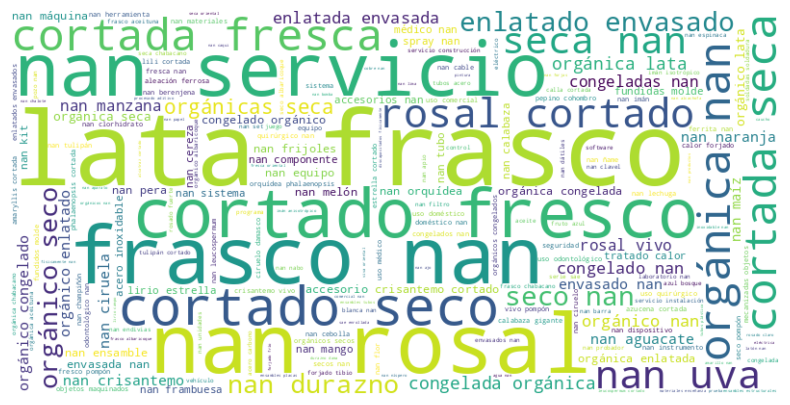

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
stop_words = stopwords.words('spanish')

# Combine 'descripcion' and 'palabras_similares' for clustering
df_selected['combined_text'] = df_selected['descripcion'].astype(str) + ' ' + df_selected['palabras_similares'].astype(str)

# Create a TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=1000)

# Fit and transform the combined text column
tfidf_matrix = vectorizer.fit_transform(df_selected['combined_text'])

# Determine the optimal number of clusters using techniques like elbow method or silhouette analysis.
num_clusters = 5

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Add the cluster labels to the dataframe
df_selected['cluster'] = kmeans.labels_

# Display the clustered dataframe
print(df_selected.head())

# Analyze the clusters. You can print the most common words in each cluster to understand their characteristics.
for i in range(num_clusters):
    cluster_df = df_selected[df_selected['cluster'] == i]
    cluster_text = ' '.join(cluster_df['combined_text'].astype(str))
    word_counts = Counter(cluster_text.lower().split())
    print(f"Cluster {i}: Most common words: {word_counts.most_common(10)}")


# Concatenate all descriptions into a single string
text = " ".join(df_selected['descripcion'].astype(str) + " " + df_selected['palabras_similares'].astype(str))

# Remove stopwords
text = ' '.join([word for word in text.lower().split() if word not in stop_words])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Siguientes Pasos

Por la naturaleza de la base de datos, nos damos cuenta que las preguntas que nos propone el ejercicio no son las ideales. Adicionalmente pudiéramos hacer los siguientes análisis de texto y visualizaciones:

- Frecuencia de palabras en las descripciones
- Longitud promedio de las descripciones
- Categorías o temas comunes en las descripciones
- Nube de palabras para las descripciones más comunes
- Gráfico de barras para las unidades más frecuentes
- Diagrama de Venn para palabras comunes entre descripción y palabras similares